In [1]:
import numpy as np
from igraph import *
import time
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt


def convert_to_adjacency(matrix):
    start = 0
    res = []
    lst = []
    n = matrix.shape[0]

    for i in range(n):
        res.append(lst*n)
    while start < n:
        y = matrix[start]
        for i in range(len(y)):
            if y[i] == 1:
                res[start].append(i)
        start += 1
    return res


def check_time(function, args):
    start = time.time()
    result =function(*args)
    delta = time.time() - start
    #print("seconds : ", delta)
    return result, delta

# Problem I

Generate graph

In [2]:
N = 100

g = Graph()
g.add_vertices(N)
edges = [(i, j) for i, j in zip(np.random.randint(0, N, N * 2), np.random.randint(0, N, N * 2))]
g.add_edges(edges)

adjacency_matrix = g.get_adjacency() # adjacency matrix
adjacency_list = convert_to_adjacency(adjacency_matrix) # adjacency list

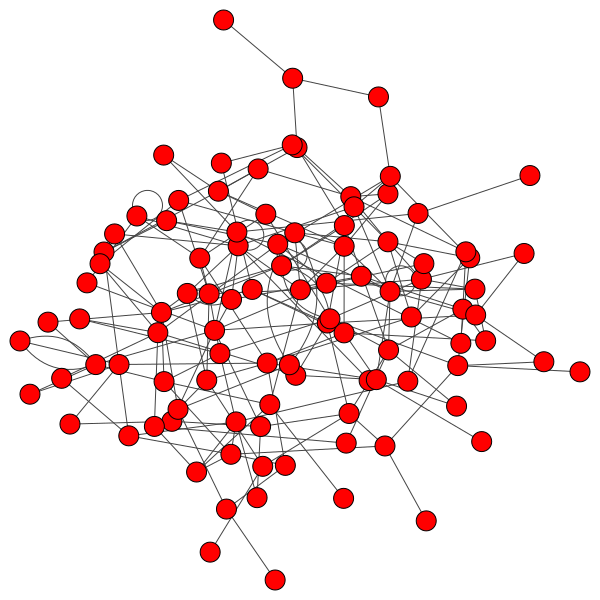

In [3]:
layout = g.layout("kk")
plot(g, layout=layout)

In [4]:
print('adjacency_matrix : \n\n', adjacency_matrix[4:6])
print('\n\nadjacency_list : \n\n', adjacency_list[4:6])

adjacency_matrix : 

 [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0]
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


adjacency_list : 

 [[26, 33, 64, 77, 95, 97], [42, 43, 51, 54, 67, 85]]


In [5]:
adjacency_dict = {key : adjacency_list[key] for key in range(N)}

In [6]:
def dfs(adjacencyList, vertex, search = None, visitedSet = None, path = None): 
    # create memo once in top-level call
    if visitedSet is None:
        visitedSet = set()
    if path is None:
        path = []
        
    visitedSet.add(vertex)
    path.append(vertex)        
        
    if vertex in adjacencyList and search not in visitedSet:
        for neighbor in adjacencyList[vertex]:
            if neighbor not in visitedSet and search not in visitedSet:
                dfs(adjacencyList, neighbor, search, visitedSet, path)
    return path


def bfs(graph, node, search = None):
    visited = []
    queue = []

    visited.append(node)
    queue.append(node)

    while queue:        
        s = queue.pop(0) 
        
        for neighbour in graph[s]:
            if neighbour not in visited and search not in visited:
                visited.append(neighbour)
                queue.append(neighbour)
    return visited

In [8]:
solve, secods = check_time(dfs, args=(adjacency_dict, 2))
print(solve) # Случа прохода всех возможных узлов
print()
solve, secods = check_time(dfs, args=(adjacency_dict, 2, 39))
print(solve) # Случай поиска необходимого узла

[2, 11, 46, 52, 9, 6, 87, 19, 53, 7, 17, 38, 27, 35, 44, 75, 12, 86, 0, 1, 21, 97, 4, 26, 55, 18, 62, 24, 77, 42, 5, 43, 16, 15, 36, 28, 47, 3, 51, 67, 33, 69, 8, 10, 32, 94, 29, 48, 14, 50, 34, 71, 98, 58, 31, 30, 41, 90, 83, 57, 82, 40, 61, 22, 59, 64, 81, 85, 70, 66, 89, 74, 78, 88, 23, 39, 80, 25, 49, 95, 72, 84, 92, 45, 13, 63, 73, 54, 60, 79, 37, 91, 65, 93, 76, 96, 56, 99, 68, 20]

[2, 11, 46, 52, 9, 6, 87, 19, 53, 7, 17, 38, 27, 35, 44, 75, 12, 86, 0, 1, 21, 97, 4, 26, 55, 18, 62, 24, 77, 42, 5, 43, 16, 15, 36, 28, 47, 3, 51, 67, 33, 69, 8, 10, 32, 94, 29, 48, 14, 50, 34, 71, 98, 58, 31, 30, 41, 90, 83, 57, 82, 40, 61, 22, 59, 64, 81, 85, 70, 66, 89, 74, 78, 88, 23, 39]


In [10]:
solve, secods = check_time(bfs, args=(adjacency_dict, 2))
print(solve) # Случа прохода всех возможных узлов

solve, secods = check_time(bfs, args=(adjacency_dict, 2, 39))
print(solve) # Случай поиска необходимого узла

[2, 11, 45, 56, 62, 92, 46, 57, 71, 94, 1, 28, 18, 24, 38, 74, 98, 43, 50, 52, 80, 35, 36, 55, 82, 83, 97, 19, 34, 87, 29, 32, 0, 21, 47, 84, 77, 7, 27, 73, 79, 26, 75, 78, 85, 58, 5, 16, 14, 86, 9, 39, 63, 15, 23, 25, 49, 44, 68, 48, 59, 99, 40, 61, 90, 4, 53, 6, 64, 65, 70, 10, 3, 69, 88, 96, 72, 42, 17, 54, 37, 51, 12, 20, 81, 95, 31, 67, 8, 13, 66, 22, 41, 33, 91, 93, 60, 30, 89, 76]
[2, 11, 45, 56, 62, 92, 46, 57, 71, 94, 1, 28, 18, 24, 38, 74, 98, 43, 50, 52, 80, 35, 36, 55, 82, 83, 97, 19, 34, 87, 29, 32, 0, 21, 47, 84, 77, 7, 27, 73, 79, 26, 75, 78, 85, 58, 5, 16, 14, 86, 9, 39]


In [78]:
dfs_logs = []
bfs_logs = []
for n in tqdm(range(10, 2000)):
    N = n
    g = Graph()
    g.add_vertices(N)
    edges = [(i, j) for i, j in zip(np.random.randint(0, N, N * 2), np.random.randint(0, N, N * 2))]
    g.add_edges(edges)

    adjacency_matrix = g.get_adjacency() # adjacency matrix
    adjacency_list = convert_to_adjacency(adjacency_matrix) # adjacency list
    
    adjacency_dict = {key : adjacency_list[key] for key in range(N)}
    
    solve, secods_dfs = check_time(dfs, args=(adjacency_dict, 6))
    solve, secods_bfs = check_time(bfs, args=(adjacency_dict, 6))
    dfs_logs.append(secods_dfs)
    bfs_logs.append(secods_bfs)

  0%|          | 0/1990 [00:00<?, ?it/s]

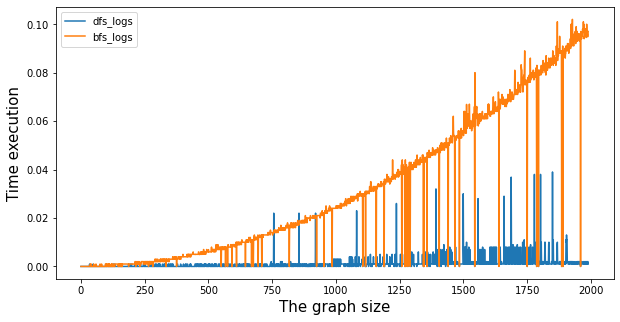

In [82]:
plt.figure(figsize=(10,5))
plt.plot(dfs_logs, label='dfs_logs')
plt.plot(bfs_logs, label='bfs_logs')
plt.xlabel("The graph size", fontsize=15)
plt.ylabel("Time execution", fontsize=15)
plt.legend()
plt.show()